# Titanic: Machine Learning from disaster

<img src='https://i0.wp.com/smartdatanet.com/wp-content/uploads/2018/05/Titanic-Survivor-Prediction-by-Machine-Learning.png?resize=840%2C471'>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
%matplotlib inline

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.shape

(891, 12)

In [4]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


0    549
1    342
Name: Survived, dtype: int64


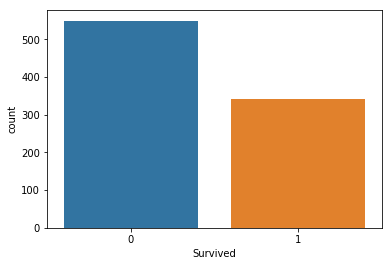

In [6]:
print(train.Survived.value_counts())
sns.countplot('Survived', data=train)
plt.show()

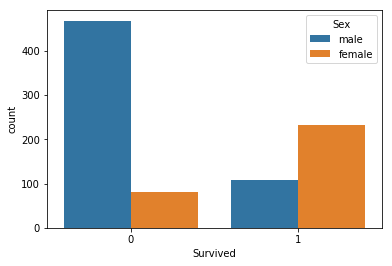

In [7]:
sns.countplot('Survived', hue='Sex', data=train)
plt.show()

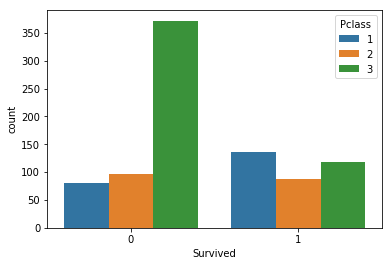

In [8]:
sns.countplot('Survived', hue='Pclass', data=train)
plt.show()

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


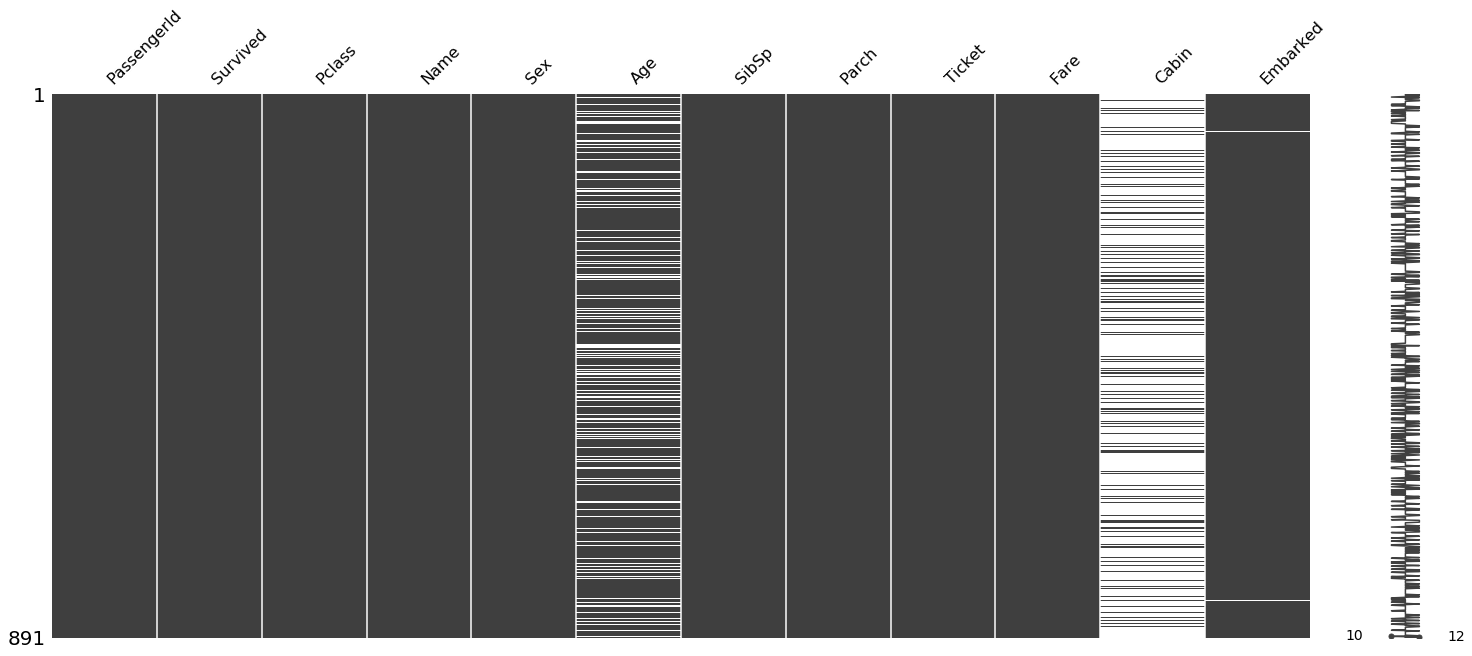

In [10]:
missingno.matrix(train)
plt.show()

In [11]:
train_data = train
train_data['Title'] = train_data.Name.apply(lambda name: name.split(',')[1].split('.')[0].strip())

test_data = test
test_data['Title'] = test_data.Name.apply(lambda name: name.split(',')[1].split('.')[0].strip())

set(train_data.Title)

{'Capt',
 'Col',
 'Don',
 'Dr',
 'Jonkheer',
 'Lady',
 'Major',
 'Master',
 'Miss',
 'Mlle',
 'Mme',
 'Mr',
 'Mrs',
 'Ms',
 'Rev',
 'Sir',
 'the Countess'}

In [12]:
normalized_titles = {
    'Capt' :    'Officer',
    'Col' :     'Officer',
    'Don':      'Royalty',
    'Dr':       'Officer',
    'Jonkheer': 'Royalty',
    'Lady':     'Royalty',
    'Major' :   'Officer',
    'Master':   'Master',
    'Miss':     'Miss',
    'Mlle':     'Miss',
    'Mme':      'Mrs',
    'Mr':       'Mr',
    'Mrs':      'Mrs',
    'Ms':       'Mrs',
    'Rev':      'Officer',
    'Sir':      'Royalty',
    'the Countess':  'Royalty'
}

In [13]:
train_data.Title = train_data.Title.map(normalized_titles)
test_data.Title = test_data.Title.map(normalized_titles)

In [14]:
train_data.Title.value_counts()

Mr         517
Miss       184
Mrs        127
Master      40
Officer     18
Royalty      5
Name: Title, dtype: int64

In [15]:
grouped = train_data.groupby(['Sex', 'Pclass', 'Title'])

grouped.Age.median()

Sex     Pclass  Title  
female  1       Miss       30.0
                Mrs        40.0
                Officer    49.0
                Royalty    40.5
        2       Miss       24.0
                Mrs        31.5
        3       Miss       18.0
                Mrs        31.0
male    1       Master      4.0
                Mr         40.0
                Officer    51.0
                Royalty    40.0
        2       Master      1.0
                Mr         31.0
                Officer    46.5
        3       Master      4.0
                Mr         26.0
Name: Age, dtype: float64

In [16]:
train_data.Age = grouped.Age.apply(lambda x: x.fillna(x.median()))
test_data.Age = grouped.Age.apply(lambda x: x.fillna(x.median()))

In [17]:
def fill_cabin_na(col):
    cabin = col[0]
    if pd.isnull(cabin):
        return 0
    else:
        return 1
    
train_data['Cabin'] = train_data[['Cabin']].apply(fill_cabin_na, axis=1)
test_data['Cabin'] = test_data[['Cabin']].apply(fill_cabin_na, axis=1)

In [18]:
most_embarked = train_data.Embarked.value_counts().index[0]

train_data.Embarked = train_data.Embarked.fillna(most_embarked)

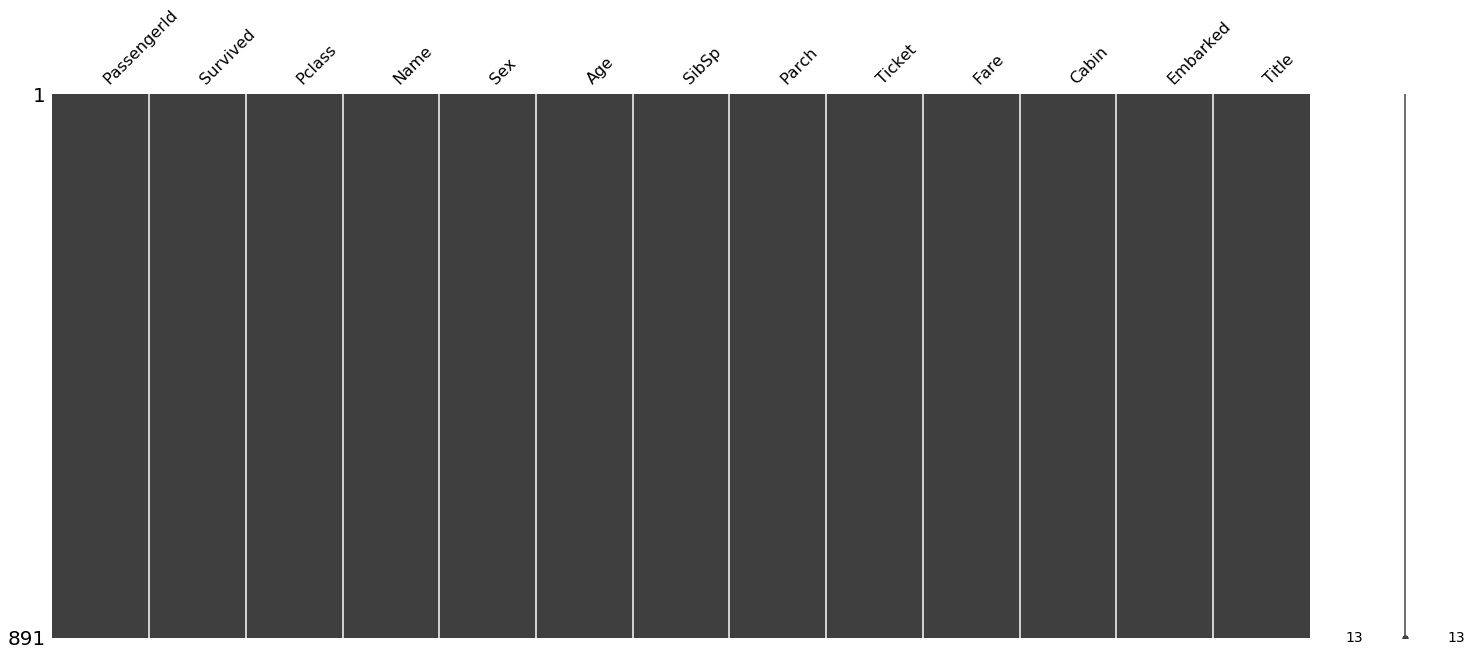

In [19]:
missingno.matrix(train_data)

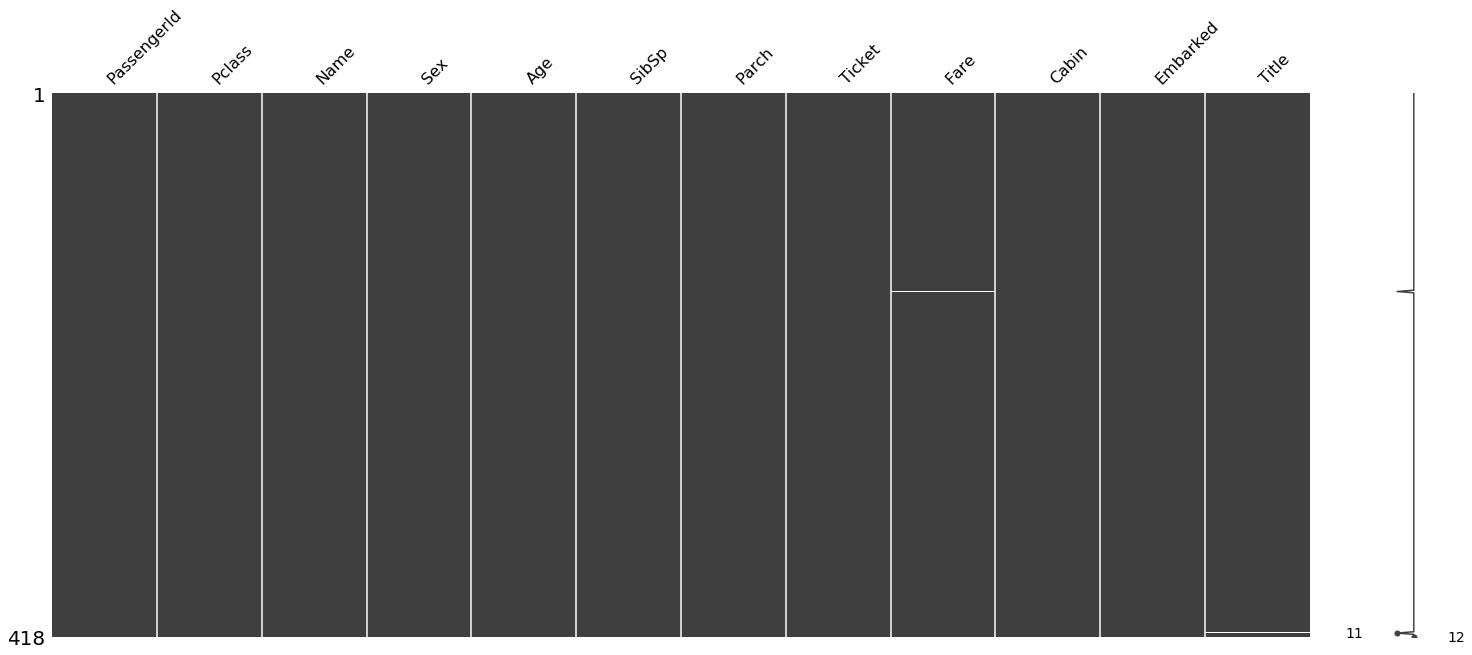

In [20]:
missingno.matrix(test_data)

In [21]:
test_data.Fare = test_data.Fare.fillna(train_data.Fare.median())

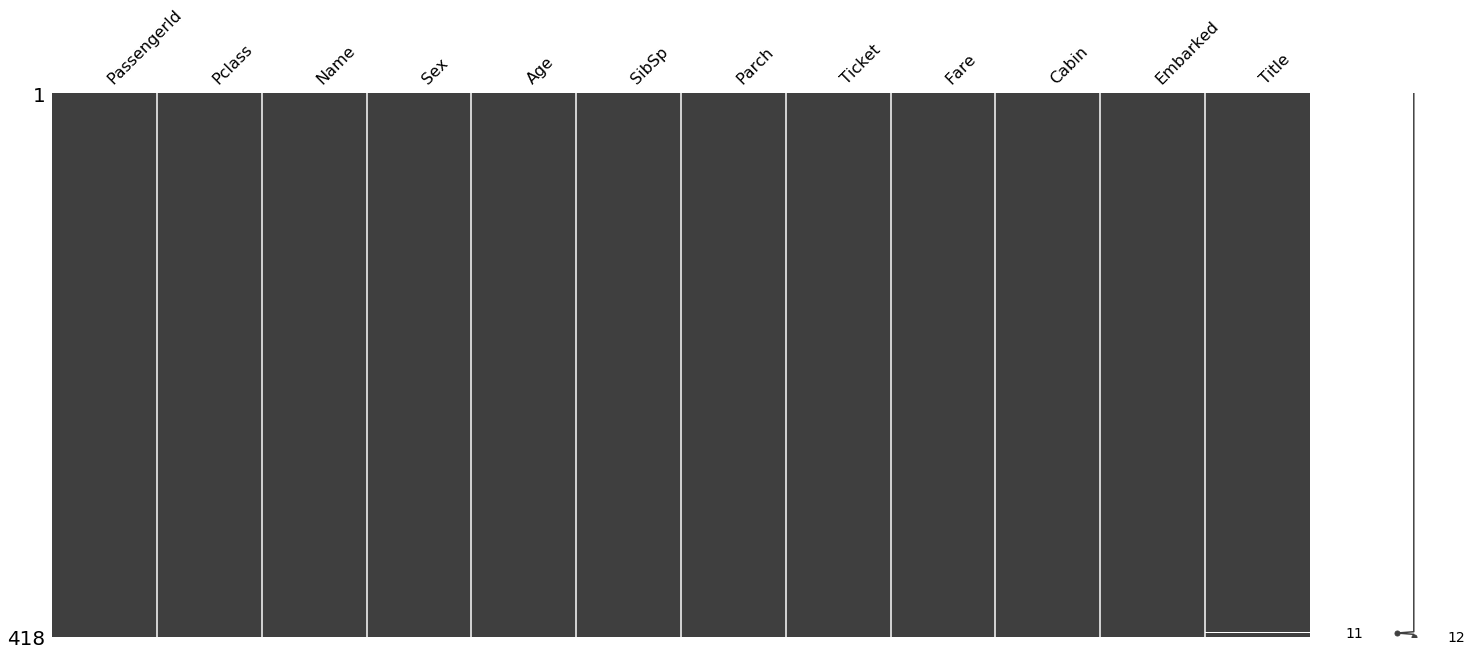

In [22]:
missingno.matrix(test_data)

In [23]:
sex = pd.get_dummies(train_data['Sex'], drop_first=True)
embark = pd.get_dummies(train_data['Embarked'], drop_first=True)
title = pd.get_dummies(train_data['Title'])
train_data.drop(['Sex', 'Embarked', 'Name', 'Ticket', 'Title'], axis=1, inplace=True)
train_data = pd.concat([train_data, sex, embark, title], axis=1)

In [24]:
train_data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,male,Q,S,Master,Miss,Mr,Mrs,Officer,Royalty
0,1,0,3,22.0,1,0,7.2500,0,1,0,1,0,0,1,0,0,0
1,2,1,1,38.0,1,0,71.2833,1,0,0,0,0,0,0,1,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,0,1,0,1,0,0,0,0
3,4,1,1,35.0,1,0,53.1000,1,0,0,1,0,0,0,1,0,0
4,5,0,3,35.0,0,0,8.0500,0,1,0,1,0,0,1,0,0,0


In [25]:
sex = pd.get_dummies(test_data['Sex'], drop_first=True)
embark = pd.get_dummies(test_data['Embarked'], drop_first=True)
title = pd.get_dummies(test_data['Title'])
test_data.drop(['Sex', 'Embarked', 'Name', 'Ticket', 'Title'], axis=1, inplace=True)
test_data = pd.concat([test_data, sex, embark, title], axis=1)

test_data.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Cabin,male,Q,S,Master,Miss,Mr,Mrs,Officer
0,892,3,22.0,0,0,7.8292,0,1,1,0,0,0,1,0,0
1,893,3,38.0,1,0,7.0000,0,0,0,1,0,0,0,1,0
2,894,2,26.0,0,0,9.6875,0,1,1,0,0,0,1,0,0
3,895,3,35.0,0,0,8.6625,0,1,0,1,0,0,1,0,0
4,896,3,35.0,1,1,12.2875,0,0,0,1,0,0,0,1,0


In [26]:
X = train_data.drop('Survived', axis=1)
y = train_data['Survived']

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [28]:
from sklearn.linear_model import LogisticRegression
regressor = LogisticRegression()
regressor.fit(X_train, y_train)

pred = regressor.predict(X_test)

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, pred))

0.820627802690583


/home/vdhage/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [30]:
from sklearn.svm import SVC
classifier1 = SVC()
classifier1.fit(X_train, y_train)

pred1 = classifier1.predict(X_test)
print(accuracy_score(y_test, pred1))

0.6098654708520179


/home/vdhage/.local/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [31]:
from sklearn.neighbors import KNeighborsClassifier
classifier2 = KNeighborsClassifier()
classifier2.fit(X_train, y_train)

pred2 = classifier2.predict(X_test)
print(accuracy_score(y_test, pred2))

0.6098654708520179


In [32]:
from sklearn.ensemble import AdaBoostClassifier
classifier3 = AdaBoostClassifier()
classifier3.fit(X_train, y_train)

pred3 = classifier3.predict(X_test)
print(accuracy_score(y_test, pred3))

0.8026905829596412


In [34]:
test_data['Royaly'] = 0

In [35]:
test_data.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Cabin,male,Q,S,Master,Miss,Mr,Mrs,Officer,Royaly
0,892,3,22.0,0,0,7.8292,0,1,1,0,0,0,1,0,0,0
1,893,3,38.0,1,0,7.0000,0,0,0,1,0,0,0,1,0,0
2,894,2,26.0,0,0,9.6875,0,1,1,0,0,0,1,0,0,0
3,895,3,35.0,0,0,8.6625,0,1,0,1,0,0,1,0,0,0
4,896,3,35.0,1,1,12.2875,0,0,0,1,0,0,0,1,0,0


In [36]:
prd = regressor.predict(test_data)
len(prd)

418

In [37]:
kaggle = pd.DataFrame({'PassengerId': test_data['PassengerId'], 'Survived': prd})
kaggle.to_csv('titanic_pred3.csv', index=False)